# Daten und Bibliotheken laden

In [1]:
#pip install seaborn


In [2]:
# Bibliotheken importieren

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Read data
# Dauer der Ausführung 1m3sec

df_holiday_events = pd.read_csv("./files/holidays_events.csv")
df_items = pd.read_csv("./files/items.csv")
df_oil = pd.read_csv("./files/oil.csv")
df_stores = pd.read_csv("./files/stores.csv")
df_transactions = pd.read_csv("./files/transactions.csv")
df_train = pd.read_csv("./files/train.csv")


/var/folders/kc/4_58vml5169c4h_nkcgknsy80000gn/T/ipykernel_1028/502424168.py:9: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df_train = pd.read_csv("./files/train.csv")


In [4]:
store_ids = df_stores[df_stores['state'] == 'Guayas']['store_nbr'].unique()

In [5]:
# df_train soll nur noch die stores aus Guayas enthalten
df_train = df_train[df_train['store_nbr'].isin(store_ids)]

In [6]:
df_stores[df_stores['state'] == 'Guayas'].head(20)

,store_nbr,city,state,type,cluster
23,24,Guayaquil,Guayas,D,1
25,26,Guayaquil,Guayas,D,10
26,27,Daule,Guayas,D,1
27,28,Guayaquil,Guayas,E,10
28,29,Guayaquil,Guayas,E,10
29,30,Guayaquil,Guayas,C,3
31,32,Guayaquil,Guayas,C,3
33,34,Guayaquil,Guayas,B,6
34,35,Playas,Guayas,C,3
35,36,Libertad,Guayas,E,10


# Daten Überblick

In [7]:
df_train.shape

(22941656, 6)

In [8]:
# Loads first 5 rows
df_train.head()

,id,date,store_nbr,item_nbr,unit_sales,onpromotion
18789,18789,2013-01-02,24,103665,6.0,NaN
18790,18790,2013-01-02,24,105574,12.0,NaN
18791,18791,2013-01-02,24,105575,2.0,NaN
18792,18792,2013-01-02,24,105577,1.0,NaN
18793,18793,2013-01-02,24,105693,7.0,NaN


In [9]:
df_oil.head()

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20


In [10]:
# Initiales Date-Parsing für alle DataFrames
# Konvertierung um spätere Fehler bei Joins oder Filtern zu vermeiden.
for df in [df_holiday_events, df_transactions, df_oil, df_items, df_stores, df_train]:
    if 'date' in df.columns:
        df['date'] = pd.to_datetime(df['date'])

In [11]:
print(df_train.info())
print()
print(df_holiday_events.info())
print()
print(df_items.info())
print()
print(df_oil.info())
print()
print(df_stores.info())
print(df_transactions.info())

<class 'pandas.core.frame.DataFrame'>
Index: 22941656 entries, 18789 to 125491524
Data columns (total 6 columns):
 #   Column       Dtype         
---  ------       -----         
 0   id           int64         
 1   date         datetime64[ns]
 2   store_nbr    int64         
 3   item_nbr     int64         
 4   unit_sales   float64       
 5   onpromotion  object        
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 1.2+ GB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         350 non-null    datetime64[ns]
 1   type         350 non-null    object        
 2   locale       350 non-null    object        
 3   locale_name  350 non-null    object        
 4   description  350 non-null    object        
 5   transferred  350 non-null    bool          
dtypes: bool(1), datetime64[ns](1), obj

# EDA

## Missing values

df_holiday_events
df_items          
df_oil            
df_stores         
df_train          
df_transactions   

In [12]:
# Checking missing values
print(f"\t df_train\n{df_train.isnull().sum()}\n")
print(f"\t df_holiday_events\n{df_holiday_events.isnull().sum()}\n")
print(f"\t df_items\n{df_items.isnull().sum()}\n")
print(f"\t df_oil\n{df_oil.isnull().sum()}\n")
print(f"\t df_stores\n{df_stores.isnull().sum()}\n")
print(f"\t df_transactions\n{df_transactions.isnull().sum()}")

	 df_train
id                   0
date                 0
store_nbr            0
item_nbr             0
unit_sales           0
onpromotion    3980341
dtype: int64

	 df_holiday_events
date           0
type           0
locale         0
locale_name    0
description    0
transferred    0
dtype: int64

	 df_items
item_nbr      0
family        0
class         0
perishable    0
dtype: int64

	 df_oil
date           0
dcoilwtico    43
dtype: int64

	 df_stores
store_nbr    0
city         0
state        0
type         0
cluster      0
dtype: int64

	 df_transactions
date            0
store_nbr       0
transactions    0
dtype: int64


In [13]:
df_train["onpromotion"].value_counts()

onpromotion
False    17446666
True      1514649
Name: count, dtype: int64

In [14]:
# Focusing on missing values in the 'onpromotion' column
df_train['onpromotion'] = df_train['onpromotion'].fillna(False).astype(bool)

/var/folders/kc/4_58vml5169c4h_nkcgknsy80000gn/T/ipykernel_1028/2380528398.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_train['onpromotion'] = df_train['onpromotion'].fillna(False).astype(bool)


In [15]:
df_oil['dcoilwtico'] = df_oil['dcoilwtico'].fillna(df_oil['dcoilwtico'].median())

In [16]:
# Checking missing values
df_train.isnull().sum()

id             0
date           0
store_nbr      0
item_nbr       0
unit_sales     0
onpromotion    0
dtype: int64

## Handling Outliers

### negative Sales bereinigen

In [17]:
# Checking for negative sales (returns)
negative_sales = df_train[df_train['unit_sales'] < 0 ]

negative_sales.head()  # Viewing negative sales for analysis

,id,date,store_nbr,item_nbr,unit_sales,onpromotion
106658,106658,2013-01-04,34,586824,-2.0,False
309805,309805,2013-01-09,35,1079215,-8.0,False
382905,382905,2013-01-11,27,1097187,-20.0,False
507901,507901,2013-01-14,30,959437,-34.0,False
547212,547212,2013-01-15,30,812751,-168.0,False


In [18]:
# Replacing negative sales with 0 to reflect returns as non-sales
df_train['unit_sales'] = df_train['unit_sales'].apply(lambda x: max(x, 0))

In [19]:
# Checking negative sales got correctly replaced
df_train[df_train['unit_sales'] < 0]

,id,date,store_nbr,item_nbr,unit_sales,onpromotion


### Ausreißer via Z-Score finden

In [20]:
"""
    Berechnet den Z-Score für die 'unit_sales' innerhalb jeder Gruppe (store_nbr, item_nbr).
    Der Z-Score gibt an, wie viele Standardabweichungen ein Datenpunkt vom Mittelwert entfernt ist.
    Eine Best Practice ist es, Division durch Null zu vermeiden, falls die Standardabweichung 0 ist
    (z.B. wenn alle Verkäufe für eine Gruppe gleich sind)."""
# besser als else 1 wäre:     group['z_score'] = 0  
# Wenn Standardabweichung 0 ist, sind alle Z-Scores 0

# Dauer der Ausführung 12Min15sec

# Function to calculate Z-score for each group (store-item combination)
def calculate_store_item_zscore(group):
    # Compute mean and standard deviation for each store-item group
    mean_sales = group['unit_sales'].mean()
    std_sales = group['unit_sales'].std()

    # Calculate Z-score (avoiding division by zero for standard deviation)
    group['z_score'] = (group['unit_sales'] - mean_sales) / (std_sales if std_sales != 0 else 1)
    return group

# Apply the Z-score calculation to each store-item group,then flatten the index
df_train_grouped = df_train.groupby(['store_nbr', 'item_nbr']).apply(calculate_store_item_zscore)
df_train_grouped.reset_index(drop=True, inplace=True)

# Define threshold for outliers (e.g., Z-score > 5)
outliers = df_train_grouped[df_train_grouped['z_score'] > 5]

# Print summary
print(f"Number of outliers detected: {len(outliers)}")
outliers.head()

Number of outliers detected: 66817


/var/folders/kc/4_58vml5169c4h_nkcgknsy80000gn/T/ipykernel_1028/2716204395.py:22: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_train_grouped = df_train.groupby(['store_nbr', 'item_nbr']).apply(calculate_store_item_zscore)


,id,date,store_nbr,item_nbr,unit_sales,onpromotion,z_score
188,15666702,2013-12-18,24,96995,14.0,False,7.946399
286,59775862,2015-10-20,24,99197,14.0,False,5.822016
289,60322807,2015-10-26,24,99197,19.0,False,8.276173
721,15717753,2013-12-19,24,103520,27.0,False,6.642670
770,18886543,2014-02-13,24,103520,22.0,False,5.154400


### Werbung rausfiltern

In [21]:
# Vereinfachte und effizientere Filterung
outliers_notonpromotion = outliers[outliers['onpromotion'] == False]

# Überprüfen Sie das Ergebnis
print(f"Anzahl der Ausreißer (nicht auf Promotion) entdeckt: {len(outliers_notonpromotion)}")
print(outliers_notonpromotion.head())

Anzahl der Ausreißer (nicht auf Promotion) entdeckt: 49719
           id       date  store_nbr  item_nbr  unit_sales  onpromotion  \
188  15666702 2013-12-18         24     96995        14.0        False   
286  59775862 2015-10-20         24     99197        14.0        False   
289  60322807 2015-10-26         24     99197        19.0        False   
721  15717753 2013-12-19         24    103520        27.0        False   
770  18886543 2014-02-13         24    103520        22.0        False   

      z_score  
188  7.946399  
286  5.822016  
289  8.276173  
721  6.642670  
770  5.154400  


### Ferien rausfiltern

In [22]:
# Filtern nach Feiertagen
# Wir überprüfen, ob die Daten dieser Ausreißer mit Feiertagen übereinstimmen.
outliers_notonpromotion['is_holiday'] = outliers_notonpromotion['date'].isin(df_holiday_events['date'])

# Herausfiltern der Ausreißer, die auf Feiertage fallen
# endgültiges DataFrame mit den relevantesten Ausreißern.
outliers_notonpromotion_noholiday = outliers_notonpromotion[outliers_notonpromotion['is_holiday'] == False]

# Zusammenfassung ausgeben
print(f"Anzahl der erkannten Ausreißer (nach allen Kriterien): {len(outliers_notonpromotion_noholiday)}")
print("\nKopf des DataFrames der relevanten Ausreißer:")
print(outliers_notonpromotion_noholiday.head())

Anzahl der erkannten Ausreißer (nach allen Kriterien): 33773

Kopf des DataFrames der relevanten Ausreißer:
           id       date  store_nbr  item_nbr  unit_sales  onpromotion  \
188  15666702 2013-12-18         24     96995        14.0        False   
286  59775862 2015-10-20         24     99197        14.0        False   
289  60322807 2015-10-26         24     99197        19.0        False   
721  15717753 2013-12-19         24    103520        27.0        False   
770  18886543 2014-02-13         24    103520        22.0        False   

      z_score  is_holiday  
188  7.946399       False  
286  5.822016       False  
289  8.276173       False  
721  6.642670       False  
770  5.154400       False  


/var/folders/kc/4_58vml5169c4h_nkcgknsy80000gn/T/ipykernel_1028/1240107446.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers_notonpromotion['is_holiday'] = outliers_notonpromotion['date'].isin(df_holiday_events['date'])


In [23]:
# DataFrames zusammenführen und 'is_outlier' Spalte erstellen

# Erstelle eine neue Spalte 'is_outlier' in df_train und initialisiere sie mit False
df_train['is_outlier'] = False

# Setze 'is_outlier' auf True für alle Zeilen in df_train, deren 'id' in outliers_notonpromotion_noholiday vorkommt
df_train.loc[df_train['id'].isin(outliers_notonpromotion_noholiday['id']), 'is_outlier'] = True

In [24]:
df_train.head()

,id,date,store_nbr,item_nbr,unit_sales,onpromotion,is_outlier
18789,18789,2013-01-02,24,103665,6.0,False,False
18790,18790,2013-01-02,24,105574,12.0,False,False
18791,18791,2013-01-02,24,105575,2.0,False,False
18792,18792,2013-01-02,24,105577,1.0,False,False
18793,18793,2013-01-02,24,105693,7.0,False,False


In [25]:
df_train["is_outlier"].value_counts()

is_outlier
False    22907883
True        33773
Name: count, dtype: int64

## Fill missing dates

In [26]:
def fill_calendar(group):
    #
    # group contains all rows for ONE (store_nbr, item_nbr) pair
    #
    g = group.set_index("date").sort_index()   # use date/calendar as the index
    g = g.asfreq("D", fill_value=0)            # make it daily; add 0 where missing
    # put the identifiers back (asfreq drops them)
    g["store_nbr"] = group["store_nbr"].iloc[0]
    g["item_nbr"]  = group["item_nbr"].iloc[0]

    return g.reset_index()                     # date back to a normal column

In [27]:
df_train_with_zscore = (
    df_train
    .groupby(["store_nbr", "item_nbr"], group_keys=False)  # keeps memory low
    .apply(fill_calendar)
)

/var/folders/kc/4_58vml5169c4h_nkcgknsy80000gn/T/ipykernel_1028/1503097717.py:4: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(fill_calendar)


In [28]:
df_train.shape

(22941656, 7)

In [29]:
df_train.head()

,id,date,store_nbr,item_nbr,unit_sales,onpromotion,is_outlier
18789,18789,2013-01-02,24,103665,6.0,False,False
18790,18790,2013-01-02,24,105574,12.0,False,False
18791,18791,2013-01-02,24,105575,2.0,False,False
18792,18792,2013-01-02,24,105577,1.0,False,False
18793,18793,2013-01-02,24,105693,7.0,False,False


In [30]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22941656 entries, 18789 to 125491524
Data columns (total 7 columns):
 #   Column       Dtype         
---  ------       -----         
 0   id           int64         
 1   date         datetime64[ns]
 2   store_nbr    int64         
 3   item_nbr     int64         
 4   unit_sales   float64       
 5   onpromotion  bool          
 6   is_outlier   bool          
dtypes: bool(2), datetime64[ns](1), float64(1), int64(3)
memory usage: 1.1 GB


## Feature Engineering

In [31]:
# Split the timestamp into model-friendly parts
df_train['year'] = df_train['date'].dt.year
df_train['month'] = df_train['date'].dt.month
df_train['day'] = df_train['date'].dt.day
df_train['day_of_week'] = df_train['date'].dt.dayofweek # Monday=0 … Sunday=6

# Lets check the result
df_train.head()

,id,date,store_nbr,item_nbr,unit_sales,onpromotion,is_outlier,year,month,day,day_of_week
18789,18789,2013-01-02,24,103665,6.0,False,False,2013,1,2,2
18790,18790,2013-01-02,24,105574,12.0,False,False,2013,1,2,2
18791,18791,2013-01-02,24,105575,2.0,False,False,2013,1,2,2
18792,18792,2013-01-02,24,105577,1.0,False,False,2013,1,2,2
18793,18793,2013-01-02,24,105693,7.0,False,False,2013,1,2,2


In [32]:
df_items.head()

,item_nbr,family,class,perishable
0,96995,GROCERY I,1093,0
1,99197,GROCERY I,1067,0
2,103501,CLEANING,3008,0
3,103520,GROCERY I,1028,0
4,103665,BREAD/BAKERY,2712,1


In [33]:
df_items.shape

(4100, 4)

# Top 3 families

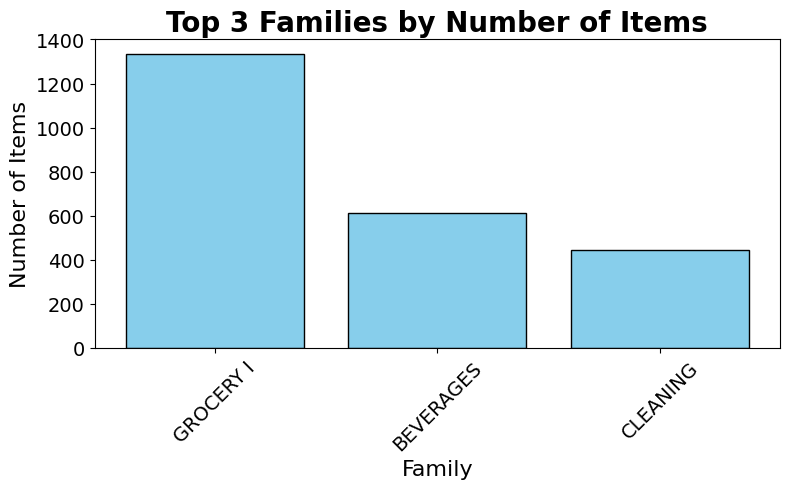

In [34]:
# Plotting the number of items per family (for top 3 families only)
# Compute the number of items per family and select the top 3 families
items_per_family = df_items['family'].value_counts().reset_index()
items_per_family.columns = ['Family', 'Item Count']
top_3_families = items_per_family.head(3)  # Keep only the top 3 families
top_10_families = items_per_family.head(10)  # Keep only the top 3 families


# Plot the top 3 families
plt.figure(figsize=(8, 5))
plt.bar(top_3_families['Family'], top_3_families['Item Count'], color='skyblue', edgecolor='black')
plt.title("Top 3 Families by Number of Items", fontsize=20, fontweight='bold')
plt.xlabel("Family", fontsize=16)
plt.ylabel("Number of Items", fontsize=16)
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)
plt.tight_layout()
# Display the plot
plt.show()

In [35]:
top_3_families.head()

,Family,Item Count
0,GROCERY I,1334
1,BEVERAGES,613
2,CLEANING,446


# Top 10 families
- Überblick über die Verteilung der Produktgruppen
- um besseren Eindruck über die Gesamtdaten zu bekommen

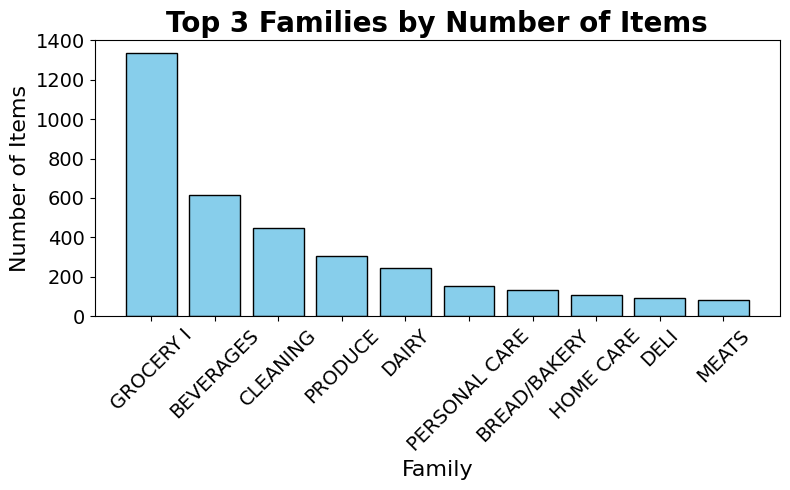

In [36]:
# Plot the top 10 families
plt.figure(figsize=(8, 5))
plt.bar(top_10_families['Family'], top_10_families['Item Count'], color='skyblue', edgecolor='black')
plt.title("Top 3 Families by Number of Items", fontsize=20, fontweight='bold')
plt.xlabel("Family", fontsize=16)
plt.ylabel("Number of Items", fontsize=16)
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)
plt.tight_layout()
# Display the plot
plt.show()

In [37]:
items_per_family.head()

,Family,Item Count
0,GROCERY I,1334
1,BEVERAGES,613
2,CLEANING,446
3,PRODUCE,306
4,DAIRY,242


In [38]:
items_per_family.tail(10)

,Family,Item Count
23,PLAYERS AND ELECTRONICS,17
24,SCHOOL AND OFFICE SUPPLIES,15
25,GROCERY II,14
26,PET SUPPLIES,14
27,SEAFOOD,8
28,MAGAZINES,6
29,HARDWARE,4
30,HOME APPLIANCES,1
31,BABY CARE,1
32,BOOKS,1


## items per family

In [39]:
df_train.columns

Index(['id', 'date', 'store_nbr', 'item_nbr', 'unit_sales', 'onpromotion',
       'is_outlier', 'year', 'month', 'day', 'day_of_week'],
      dtype='object')

In [40]:
# Next, we filter our the dataset
# Assuming that train.csv file was read into a variable called df_train
# Get the list of item_nbrs that belong to those families
item_ids = df_items[df_items['family'].isin(top_3_families['Family'].unique())]['item_nbr'].unique()

# Filter the training data
df_train = df_train[df_train['item_nbr'].isin(item_ids)]

df_train.head()

,id,date,store_nbr,item_nbr,unit_sales,onpromotion,is_outlier,year,month,day,day_of_week
18790,18790,2013-01-02,24,105574,12.0,False,False,2013,1,2,2
18791,18791,2013-01-02,24,105575,2.0,False,False,2013,1,2,2
18792,18792,2013-01-02,24,105577,1.0,False,False,2013,1,2,2
18793,18793,2013-01-02,24,105693,7.0,False,False,2013,1,2,2
18794,18794,2013-01-02,24,105737,17.0,False,False,2013,1,2,2


In [41]:
df_train.shape

(14745768, 11)

In [42]:
df_items.head()

,item_nbr,family,class,perishable
0,96995,GROCERY I,1093,0
1,99197,GROCERY I,1067,0
2,103501,CLEANING,3008,0
3,103520,GROCERY I,1028,0
4,103665,BREAD/BAKERY,2712,1


In [43]:
df_holiday_events.head()

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


In [44]:
df_holiday_events['date'].duplicated().sum()


38

# Join tables

In [45]:
# Führe einen Merge (Join) auf der gemeinsamen Spalte 'item_nbr' durch
df_train = pd.merge(df_train, df_items, on='item_nbr', how='left')
df_train = pd.merge(df_train, df_oil, on='date', how='left')
df_train = pd.merge(df_train, df_stores, on='store_nbr', how='left')
df_train = pd.merge(df_train, df_holiday_events, on='date', how='left')
df_train = pd.merge(df_train, df_transactions, on=['date', 'store_nbr'], how='left')

df_train.head()

,id,date,store_nbr,item_nbr,unit_sales,onpromotion,is_outlier,year,month,day,...,city,state,type_x,cluster,type_y,locale,locale_name,description,transferred,transactions
0,18790,2013-01-02,24,105574,12.0,False,False,2013,1,2,...,Guayaquil,Guayas,D,1,NaN,NaN,NaN,NaN,NaN,2605.0
1,18791,2013-01-02,24,105575,2.0,False,False,2013,1,2,...,Guayaquil,Guayas,D,1,NaN,NaN,NaN,NaN,NaN,2605.0
2,18792,2013-01-02,24,105577,1.0,False,False,2013,1,2,...,Guayaquil,Guayas,D,1,NaN,NaN,NaN,NaN,NaN,2605.0
3,18793,2013-01-02,24,105693,7.0,False,False,2013,1,2,...,Guayaquil,Guayas,D,1,NaN,NaN,NaN,NaN,NaN,2605.0
4,18794,2013-01-02,24,105737,17.0,False,False,2013,1,2,...,Guayaquil,Guayas,D,1,NaN,NaN,NaN,NaN,NaN,2605.0


In [46]:
df_train.shape

(15033129, 25)

## Handling missing values nach join

In [47]:
df_train['date'].min()

Timestamp('2013-01-02 00:00:00')

In [48]:
df_train['date'].max()

Timestamp('2017-08-15 00:00:00')

In [49]:
df_train.isnull().sum()

id                     0
date                   0
store_nbr              0
item_nbr               0
unit_sales             0
onpromotion            0
is_outlier             0
year                   0
month                  0
day                    0
day_of_week            0
family                 0
class                  0
perishable             0
dcoilwtico       4633254
city                   0
state                  0
type_x                 0
cluster                0
type_y          12489318
locale          12489318
locale_name     12489318
description     12489318
transferred     12489318
transactions       18979
dtype: int64

In [50]:
df_train['dcoilwtico'] = df_train['dcoilwtico'].fillna(df_train['dcoilwtico'].median())

In [51]:
df_train['type_y'] = df_train['type_y'].fillna(0)
df_train['locale'] = df_train['locale'].fillna(0)
df_train['locale_name'] = df_train['locale_name'].fillna(0)
df_train['description'] = df_train['description'].fillna(0)
df_train['transferred'] = df_train['transferred'].fillna(0)

In [52]:
df_train['transactions'] = df_train['transactions'].fillna(0)

In [54]:
df_train.isnull().sum()

id              0
date            0
store_nbr       0
item_nbr        0
unit_sales      0
onpromotion     0
is_outlier      0
year            0
month           0
day             0
day_of_week     0
family          0
class           0
perishable      0
dcoilwtico      0
city            0
state           0
type_x          0
cluster         0
type_y          0
locale          0
locale_name     0
description     0
transferred     0
transactions    0
dtype: int64

In [56]:
# Rename multiple columns
df_train = df_train.rename(columns={'type_x': 'store_type', 
                                      'cluster': 'sim_store_cluster', 
                                      'type_y': 'holiday_type', 
                                      'locale': 'holiday_locale', 
                                      'locale_name': 'holiday_locale_name', 
                                      'description': 'holiday_description', 
                                      'transferred': 'holiday_transferred', 
                                      'class': 'item_class'})

print(df_train)

                 id       date  store_nbr  item_nbr  unit_sales  onpromotion  \
0             18790 2013-01-02         24    105574        12.0        False   
1             18791 2013-01-02         24    105575         2.0        False   
2             18792 2013-01-02         24    105577         1.0        False   
3             18793 2013-01-02         24    105693         7.0        False   
4             18794 2013-01-02         24    105737        17.0        False   
...             ...        ...        ...       ...         ...          ...   
15033124  125491519 2017-08-15         51   2122188         1.0        False   
15033125  125491520 2017-08-15         51   2123727         2.0        False   
15033126  125491521 2017-08-15         51   2123750         3.0        False   
15033127  125491522 2017-08-15         51   2123775         1.0        False   
15033128  125491523 2017-08-15         51   2123791         1.0        False   

          is_outlier  year  month  day 

In [57]:
df_train.head()

,id,date,store_nbr,item_nbr,unit_sales,onpromotion,is_outlier,year,month,day,...,city,state,store_type,sim_store_cluster,holiday_type,holiday_locale,holiday_locale_name,holiday_description,holiday_transferred,transactions
0,18790,2013-01-02,24,105574,12.0,False,False,2013,1,2,...,Guayaquil,Guayas,D,1,0,0,0,0,0,2605.0
1,18791,2013-01-02,24,105575,2.0,False,False,2013,1,2,...,Guayaquil,Guayas,D,1,0,0,0,0,0,2605.0
2,18792,2013-01-02,24,105577,1.0,False,False,2013,1,2,...,Guayaquil,Guayas,D,1,0,0,0,0,0,2605.0
3,18793,2013-01-02,24,105693,7.0,False,False,2013,1,2,...,Guayaquil,Guayas,D,1,0,0,0,0,0,2605.0
4,18794,2013-01-02,24,105737,17.0,False,False,2013,1,2,...,Guayaquil,Guayas,D,1,0,0,0,0,0,2605.0


In [58]:
df_train["family"].unique()

array(['GROCERY I', 'CLEANING', 'BEVERAGES'], dtype=object)

In [59]:
df_train["sim_store_cluster"].unique()

array([ 1, 10,  3,  6, 17])

## Datentypen checken

In [60]:
df_train.dtypes

id                              int64
date                   datetime64[ns]
store_nbr                       int64
item_nbr                        int64
unit_sales                    float64
onpromotion                      bool
is_outlier                       bool
year                            int32
month                           int32
day                             int32
day_of_week                     int32
family                         object
item_class                      int64
perishable                      int64
dcoilwtico                    float64
city                           object
state                          object
store_type                     object
sim_store_cluster               int64
holiday_type                   object
holiday_locale                 object
holiday_locale_name            object
holiday_description            object
holiday_transferred            object
transactions                  float64
dtype: object

In [61]:
df_train.shape

(15033129, 25)

# df_clean

## df_train_clean parquet

In [69]:
#save_path = "./files/df_train_clean.pkl" # example of path
df_train['holiday_type'] = df_train['holiday_type'].astype(str)
#df_train['National'] = df_train['National'].astype(str)

save_path = "./files/df_train_clean.parquet" # example of path
df_train.to_parquet(save_path)
#df_train.to_pickle(save_path)


ArrowInvalid: ("Could not convert 'National' with type str: tried to convert to int64", 'Conversion failed for column holiday_locale with type object')

In [65]:
df_train_clean = pd.read_parquet("./files/df_train_clean.parquet")

ArrowInvalid: Could not open Parquet input source '<Buffer>': Parquet magic bytes not found in footer. Either the file is corrupted or this is not a parquet file.

In [ ]:
df_train_clean.head()

,id,date,store_nbr,item_nbr,unit_sales,onpromotion,is_outlier,year,month,day,...,city,state,store_type,sim_store_cluster,holiday_type,holiday_locale,holiday_locale_name,holiday_description,holiday_transferred,transactions
0,18790,2013-01-02,24,105574,12.0,False,False,2013,1,2,...,Guayaquil,Guayas,D,1,0,0,0,0,0,2605.0
1,18791,2013-01-02,24,105575,2.0,False,False,2013,1,2,...,Guayaquil,Guayas,D,1,0,0,0,0,0,2605.0
2,18792,2013-01-02,24,105577,1.0,False,False,2013,1,2,...,Guayaquil,Guayas,D,1,0,0,0,0,0,2605.0
3,18793,2013-01-02,24,105693,7.0,False,False,2013,1,2,...,Guayaquil,Guayas,D,1,0,0,0,0,0,2605.0
4,18794,2013-01-02,24,105737,17.0,False,False,2013,1,2,...,Guayaquil,Guayas,D,1,0,0,0,0,0,2605.0


In [ ]:
df_train_clean.shape

(15033129, 25)

In [ ]:
pip freeze > requirements.txt

Note: you may need to restart the kernel to use updated packages.
